In [9]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | coquimbo
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | hofn
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | viligili
City not found. Skipping...
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | ostrovnoy
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | port macquarie
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | elko
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | roma
Processing Record 19 of Set 1 | vila velha
Processing Record 20 of Set 1 | anloga
Processing Record 21 of Set 1 | galle
Processing Record 22 of Set 

Processing Record 38 of Set 4 | mount gambier
Processing Record 39 of Set 4 | wewak
Processing Record 40 of Set 4 | haines junction
Processing Record 41 of Set 4 | fougamou
Processing Record 42 of Set 4 | jos
Processing Record 43 of Set 4 | sinnamary
Processing Record 44 of Set 4 | carutapera
Processing Record 45 of Set 4 | sahrak
City not found. Skipping...
Processing Record 46 of Set 4 | grand-santi
Processing Record 47 of Set 4 | bethel
Processing Record 48 of Set 4 | inuvik
Processing Record 49 of Set 4 | etla
Processing Record 50 of Set 4 | sur
Processing Record 1 of Set 5 | hurricane
Processing Record 2 of Set 5 | yeppoon
Processing Record 3 of Set 5 | komsomolskiy
Processing Record 4 of Set 5 | mahebourg
Processing Record 5 of Set 5 | dolbeau
City not found. Skipping...
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 5 | hasaki
Processing Record 8 of Set 5 | evans
Processing Record 9 of Set 5 | bathsheba
Processing Record 10 of Set 

Processing Record 26 of Set 8 | elat
Processing Record 27 of Set 8 | asau
Processing Record 28 of Set 8 | vyazma
Processing Record 29 of Set 8 | amapa
Processing Record 30 of Set 8 | chifeng
Processing Record 31 of Set 8 | geraldton
Processing Record 32 of Set 8 | victoria
Processing Record 33 of Set 8 | longyearbyen
Processing Record 34 of Set 8 | zhigansk
Processing Record 35 of Set 8 | rosetta
Processing Record 36 of Set 8 | lipari
Processing Record 37 of Set 8 | vagay
Processing Record 38 of Set 8 | half moon bay
Processing Record 39 of Set 8 | tahta
Processing Record 40 of Set 8 | kruisfontein
Processing Record 41 of Set 8 | codrington
Processing Record 42 of Set 8 | kavieng
Processing Record 43 of Set 8 | ponta delgada
Processing Record 44 of Set 8 | solnechnyy
Processing Record 45 of Set 8 | ailigandi
Processing Record 46 of Set 8 | the valley
Processing Record 47 of Set 8 | maumere
Processing Record 48 of Set 8 | abu samrah
Processing Record 49 of Set 8 | tolaga bay
Processing 

Processing Record 13 of Set 12 | mount pleasant
Processing Record 14 of Set 12 | limon
Processing Record 15 of Set 12 | los llanos de aridane
Processing Record 16 of Set 12 | sorong
Processing Record 17 of Set 12 | alcaniz
Processing Record 18 of Set 12 | talaya
Processing Record 19 of Set 12 | avera
Processing Record 20 of Set 12 | uyuni
Processing Record 21 of Set 12 | tomatlan
Processing Record 22 of Set 12 | grand centre
City not found. Skipping...
Processing Record 23 of Set 12 | nioro
Processing Record 24 of Set 12 | sambava
Processing Record 25 of Set 12 | yakeshi
Processing Record 26 of Set 12 | porto belo
Processing Record 27 of Set 12 | great yarmouth
Processing Record 28 of Set 12 | vredendal
Processing Record 29 of Set 12 | bechem
Processing Record 30 of Set 12 | astana
Processing Record 31 of Set 12 | lengshuijiang
Processing Record 32 of Set 12 | angoche
Processing Record 33 of Set 12 | maraba
Processing Record 34 of Set 12 | asheboro
Processing Record 35 of Set 12 | blac

In [17]:
len(city_data)

552

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,42.80,81,75,12.75,CL,2020-08-21 21:55:50
1,Coquimbo,-29.95,-71.34,53.60,81,0,11.41,CL,2020-08-21 22:00:07
2,Vaini,-21.20,-175.20,77.00,88,40,6.93,TO,2020-08-21 22:00:07
3,Ushuaia,-54.80,-68.30,44.60,70,75,19.46,AR,2020-08-21 21:56:47
4,Ribeira Grande,38.52,-28.70,69.60,65,2,5.26,PT,2020-08-21 22:00:08
5,Puerto Ayora,-0.74,-90.35,78.80,47,86,13.87,EC,2020-08-21 22:00:08
6,Hofn,64.25,-15.21,49.41,58,0,21.45,IS,2020-08-21 21:55:24
7,Qaanaaq,77.48,-69.36,39.34,76,88,3.09,GL,2020-08-21 22:00:09
8,Kodiak,57.79,-152.41,73.40,40,1,14.99,US,2020-08-21 22:00:09
9,Jamestown,42.10,-79.24,79.00,54,1,5.82,US,2020-08-21 22:00:10


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-08-21 21:55:50,-53.15,-70.92,42.80,81,75,12.75
1,Coquimbo,CL,2020-08-21 22:00:07,-29.95,-71.34,53.60,81,0,11.41
2,Vaini,TO,2020-08-21 22:00:07,-21.20,-175.20,77.00,88,40,6.93
3,Ushuaia,AR,2020-08-21 21:56:47,-54.80,-68.30,44.60,70,75,19.46
4,Ribeira Grande,PT,2020-08-21 22:00:08,38.52,-28.70,69.60,65,2,5.26
5,Puerto Ayora,EC,2020-08-21 22:00:08,-0.74,-90.35,78.80,47,86,13.87
6,Hofn,IS,2020-08-21 21:55:24,64.25,-15.21,49.41,58,0,21.45
7,Qaanaaq,GL,2020-08-21 22:00:09,77.48,-69.36,39.34,76,88,3.09
8,Kodiak,US,2020-08-21 22:00:09,57.79,-152.41,73.40,40,1,14.99
9,Jamestown,US,2020-08-21 22:00:10,42.10,-79.24,79.00,54,1,5.82


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1598104974.781932

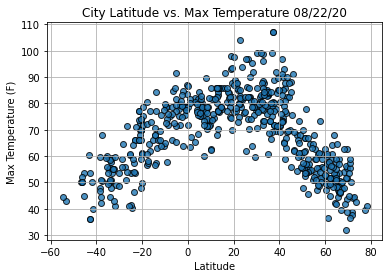

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

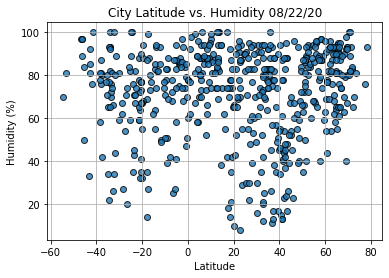

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

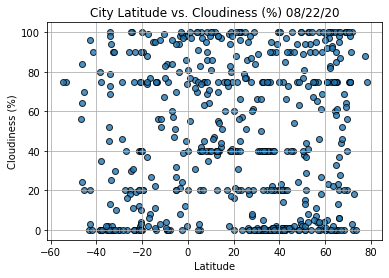

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

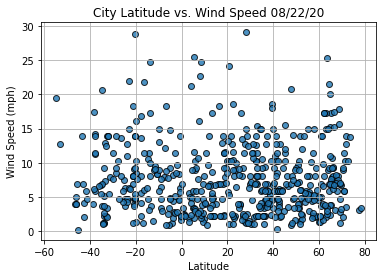

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()